## Laboratorio 2

###### Maria Isabel Ortiz Naranjo
###### Luis Alejandro Urbina
###### Catedratico: Jorge Yass 
###### Catedra: Security Data Science

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import contractions
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn import metrics, model_selection, tree
from sklearn.naive_bayes import MultinomialNB

In [2]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/isa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/isa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/isa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/isa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Exploracion de datos 

In [3]:
df = pd.read_csv("enronSpamSubset.csv")
df1 = pd.read_csv("completeSpamAssassin.csv")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


In [5]:
df1.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   Unnamed: 0.1  10000 non-null  int64 
 2   Body          10000 non-null  object
 3   Label         10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


In [8]:
thw = [df,df1]

In [9]:
df_or = pd.concat(thw)

In [10]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16046 entries, 0 to 6045
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16046 non-null  int64  
 1   Unnamed: 0.1  10000 non-null  float64
 2   Body          16045 non-null  object 
 3   Label         16046 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 626.8+ KB


In [11]:
df_or.head()

,Unnamed: 0,Unnamed: 0.1,Body,Label
0,2469,2469.0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063.0,Subject: are you listed in major search engine...,1
2,12564,12564.0,"Subject: important information thu , 30 jun 20...",1
3,2796,2796.0,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468.0,"Subject: "" bidstogo "" is places to go , things...",1


In [12]:
df_or = df_or[['Body', 'Label']]
df_or.head()

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1


## Preprocesamiento

###### Codigo inspirado por el notebook visto en clase: Preprocesamiento.ipynb

In [13]:
import unicodedata
import re

df_or['Body'] = df_or['Body'].str.strip()
df_or['Body'] = df_or['Body'].str.lower()

def removerAcentos(texto):
    texto = unicodedata.normalize('NFKD', str(texto)).encode('ascii','ignore').decode('utf-8','ignore')
    return texto

def removerCaracteresEspecialesNumerosSimbolos(texto, removerDigitos =False):
    patron = r'[^a-zA-Z0-9\s]' if not removerDigitos else r'[^a-zA-Z\s]'
    texto = re.sub(patron,'', texto, re.I|re.A)
    return texto

In [14]:
df_or['Body'] = df_or['Body'].apply(removerAcentos)
df_or['Body'] = df_or['Body'].apply(removerCaracteresEspecialesNumerosSimbolos)
df_or['Body'] = df_or['Body'].apply(contractions.fix)
stop_words_english = nltk.corpus.stopwords.words('english')

In [15]:
def doc(texto):
    tokens = nltk.word_tokenize(texto)
    filtered_tokens = [token for token in tokens if token not in stop_words_english]
    texto = ' '.join(filtered_tokens)
    return texto

df_or['Body'] = df_or['Body'].apply(doc)
df_or.head


<bound method NDFrame.head of                                                    Body  Label
0     subject stock promo mover cwtd urgent investor...      1
1     subject listed major search engines submitting...      1
2     subject important information thu 30 jun 2005 ...      1
3     subject utf 8 q bask life utf 8 q individual i...      1
4     subject bidstogo places go things hello privac...      1
...                                                 ...    ...
6041                                              empty      0
6042  oneten 271102 insignificant matters heavily ov...      0
6043  issue01 readers write 02 extension search 03 d...      0
6044                                              empty      0
6045                                              empty      0

[16046 rows x 2 columns]>

In [16]:
df_or.info

<bound method DataFrame.info of                                                    Body  Label
0     subject stock promo mover cwtd urgent investor...      1
1     subject listed major search engines submitting...      1
2     subject important information thu 30 jun 2005 ...      1
3     subject utf 8 q bask life utf 8 q individual i...      1
4     subject bidstogo places go things hello privac...      1
...                                                 ...    ...
6041                                              empty      0
6042  oneten 271102 insignificant matters heavily ov...      0
6043  issue01 readers write 02 extension search 03 d...      0
6044                                              empty      0
6045                                              empty      0

[16046 rows x 2 columns]>

## Representacion de texto

##### Codigo inspirado por: Representacion de texto.ipynb

In [17]:
cv = CountVectorizer(min_df=0.1, max_df=0.9)
cv_matrix = cv.fit_transform(df_or['Body'])
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
# Palabras únicas del corpus
vocabulario = cv.get_feature_names()
# Mostrar el vector
df_orFinal = pd.DataFrame(cv_matrix, columns=vocabulario)


In [19]:
df_orFinal.head()

,10,2000,2002,also,best,business,cc,click,com,company,...,thanks,time,today,us,use,want,way,well,work,would
0,0,0,1,0,0,4,0,0,0,6,...,0,2,2,0,1,0,0,0,1,1
1,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,0,0,0,0,1,0,0,0,2,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
df_orFinal.to_csv('model1.csv', index=False)

In [21]:
tv = TfidfVectorizer(min_df=0.1, max_df=0.9, use_idf=True)
tv_matrix = tv.fit_transform(df_or['Body'])
tv_matrix = tv_matrix.toarray()

In [22]:
vocabulario = tv.get_feature_names()
df_tv = pd.DataFrame(np.round(tv_matrix, 2), columns=vocabulario)
df_tv.head()

,10,2000,2002,also,best,business,cc,click,com,company,...,thanks,time,today,us,use,want,way,well,work,would
0,0.0,0.0,0.09,0.0,0.00,0.38,0.0,0.0,0.00,0.6,...,0.0,0.16,0.2,0.00,0.09,0.00,0.00,0.0,0.1,0.08
1,0.0,0.0,0.00,0.0,0.33,0.33,0.0,0.0,0.00,0.0,...,0.0,0.27,0.0,0.00,0.00,0.32,0.34,0.0,0.0,0.00
2,0.0,0.0,0.00,0.0,0.29,0.00,0.0,0.0,0.49,0.0,...,0.0,0.00,0.0,0.25,0.00,0.00,0.00,0.0,0.0,0.00
3,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00
4,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.00,0.19,0.00,0.00,0.0,0.0,0.00


In [23]:
df_tv.to_csv('modelo2.csv', index=False)

In [24]:
bv = CountVectorizer(ngram_range=(1,2), min_df=0.1, max_df=0.9)
bv_matrix = bv.fit_transform(df_or['Body'])
bv_matrix = bv_matrix.toarray()
vocabulario = bv.get_feature_names()
df_bv = pd.DataFrame(bv_matrix, columns=vocabulario)

df_bv.head()

,10,2000,2002,also,best,business,cc,click,com,company,...,thanks,time,today,us,use,want,way,well,work,would
0,0,0,1,0,0,4,0,0,0,6,...,0,2,2,0,1,0,0,0,1,1
1,0,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,0,0,0,0,1,0,0,0,2,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
df_bv.to_csv('modelo3.csv', index=False)

In [32]:
df_01 = pd.read_csv('model1.csv')
df_02 = pd.read_csv('modelo2.csv')
df_03 = pd.read_csv('modelo3.csv')


In [34]:
bow_train, bow_test, bow_target_train, bow_target_test = model_selection.train_test_split(df_01, df_or['Label'], test_size=0.3, random_state=123)
bigram_train, bigram_test, bigram_target_train, bigram_target_test = model_selection.train_test_split(df_02, df_or['Label'], test_size=0.3, random_state=123)
tf_id_train, tf_id_test, tf_id_target_train, tf_id_target_test = model_selection.train_test_split(df_03, df_or['Label'], test_size=0.3, random_state=123)

In [36]:
# Modelo 1
model1 = MultinomialNB()
model1.fit(bow_train, bow_target_train)

pred_bow = model1.predict(bow_test)

print(metrics.accuracy_score(bow_target_test, pred_bow))
print('Matriz de confusion', metrics.confusion_matrix(bow_target_test, pred_bow))
print(metrics.classification_report(bow_target_test, pred_bow, target_names=['0', '1']))

0.73764021603656
Matriz de confusion [[2064  676]
 [ 587 1487]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77      2740
           1       0.69      0.72      0.70      2074

    accuracy                           0.74      4814
   macro avg       0.73      0.74      0.73      4814
weighted avg       0.74      0.74      0.74      4814



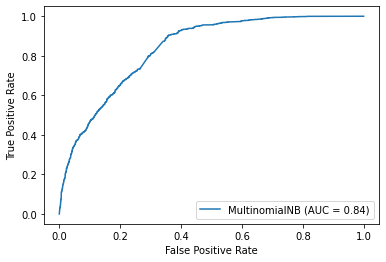

In [37]:
metrics.plot_roc_curve(model1, bow_test, bow_target_test)
plt.show()

In [39]:
#Modelo 2
modelo2 = MultinomialNB()
modelo2.fit(bigram_train, bigram_target_train)

pred_bow = modelo2.predict(bow_test)

print(metrics.accuracy_score(bow_target_test, pred_bow))
print('Matriz de confusion', metrics.confusion_matrix(bow_target_test, pred_bow))
print(metrics.classification_report(bow_target_test, pred_bow, target_names=['0', '1']))

0.8309098462816784
Matriz de confusion [[2230  510]
 [ 304 1770]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      2740
           1       0.78      0.85      0.81      2074

    accuracy                           0.83      4814
   macro avg       0.83      0.83      0.83      4814
weighted avg       0.84      0.83      0.83      4814



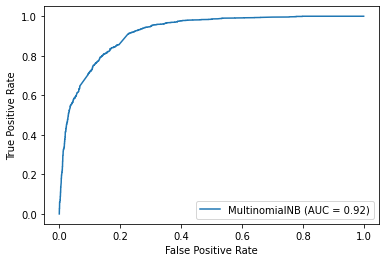

In [40]:
metrics.plot_roc_curve(modelo2, bigram_test, bigram_target_test)
plt.show()

In [42]:
# Modelo 3
modelo3 = MultinomialNB()
modelo3.fit(bigram_train, bigram_target_train)

pred_bow = modelo3.predict(bow_test)

print(metrics.accuracy_score(bow_target_test, pred_bow))
print('Matriz de confusion', metrics.confusion_matrix(bow_target_test, pred_bow))
print(metrics.classification_report(bow_target_test, pred_bow, target_names=['0', '1']))

0.8309098462816784
Matriz de confusion [[2230  510]
 [ 304 1770]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      2740
           1       0.78      0.85      0.81      2074

    accuracy                           0.83      4814
   macro avg       0.83      0.83      0.83      4814
weighted avg       0.84      0.83      0.83      4814



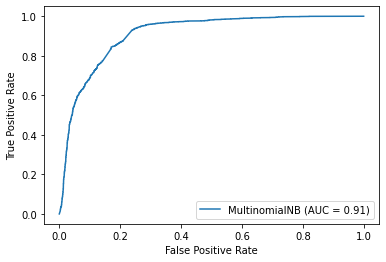

In [43]:
metrics.plot_roc_curve(modelo3, tf_id_test, tf_id_target_test)
plt.show()

#### Conclusion 


##### Lo que puede observarse que el modelo que tiene mas accuracy es el modelo 2, BI-GRAMS ya que indica que tiene un 92% de precisión. Aunque los demas no se quedan atras, pues tienen 91% y un 84% de precisión que tambien es bastante confiable. 
